## Busines Understanding

## Data Collection

In [1]:
import pandas as pd

df = pd.read_csv('tweets.csv')

## Pre-processing

#### Case Folding

In [2]:
import string

df['clean_tweet'] = df['tweet'].str.lower()

In [3]:
import re

#to delete a number attached to a word in the 'clean_tweet' column of the df DataFrame
df['clean_tweet'] = df['clean_tweet'].str.replace(r'\d+', '', regex=True)

#to remove special characters other than letters, numbers, and spaces in the 'clean_tweet' column of the df DataFrame.
df['clean_tweet'] = df['clean_tweet'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)

#to remove punctuation inside column 'clean_tweet' on DataFrame df.
df['clean_tweet'] = df['clean_tweet'].str.translate(str.maketrans("","",string.punctuation))

df

,Unnamed: 0,tweet,clean_tweet
0,0,GA 2 tumbler kece by Uniqlo new untuk 2 orang ...,ga tumbler kece by uniqlo new untuk orang si...
1,1,Udah gajian tetep ga sanggup belanja di uniqlo,udah gajian tetep ga sanggup belanja di uniqlo
2,2,Sering padahal begini Uniqlo pernah dapet UT g...,sering padahal begini uniqlo pernah dapet ut g...
3,3,MASIH ADA GA KLU ADA BESOK GW SAMPERIN UNIQLO ...,masih ada ga klu ada besok gw samperin uniqlo ...
4,4,Wiiii uniqlo lagi diskon yuk,wiiii uniqlo lagi diskon yuk
...,...,...,...
1662,1662,Jaman SMA pengen ke mall Kuningan apa tu jauh ...,jaman sma pengen ke mall kuningan apa tu jauh ...
1663,1663,Saya sih pengguna Uniqlo H amp M dan Levi s se...,saya sih pengguna uniqlo h amp m dan levi s se...
1664,1664,Uniqlo kapan diskon lg si,uniqlo kapan diskon lg si
1665,1665,Uniqlo,uniqlo


#### Clear Emoji

In [4]:
#to remove spaces at the beginning and end of the text, we use .strip in the string method
df['clean_tweet'] = df['clean_tweet'].str.strip()

#to separate each word in the text into separate elements in a list, we use the .split in the string method
df['clean_tweet'] = df['clean_tweet'].str.split()

def emoji_cleaner(data):
    word_emoji = data
    word_list = [] #a variable that contains a list to store the initial text and an empty list that will contain the words after the emoji is removed.
    emoji_pattern = re.compile("["
                u"\U0001F600-\U0001F64F"  # emoticons
                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                    "]+", flags=re.UNICODE)
    
    for word in word_emoji:
        emoji_pattern.sub(r'', word) 
        word_list.append(word)
    
    data = ' '.join(word_list)
    return data

#to implement the function, we can use the .apply method
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: emoji_cleaner(x))
df

,Unnamed: 0,tweet,clean_tweet
0,0,GA 2 tumbler kece by Uniqlo new untuk 2 orang ...,ga tumbler kece by uniqlo new untuk orang sila...
1,1,Udah gajian tetep ga sanggup belanja di uniqlo,udah gajian tetep ga sanggup belanja di uniqlo
2,2,Sering padahal begini Uniqlo pernah dapet UT g...,sering padahal begini uniqlo pernah dapet ut g...
3,3,MASIH ADA GA KLU ADA BESOK GW SAMPERIN UNIQLO ...,masih ada ga klu ada besok gw samperin uniqlo ...
4,4,Wiiii uniqlo lagi diskon yuk,wiiii uniqlo lagi diskon yuk
...,...,...,...
1662,1662,Jaman SMA pengen ke mall Kuningan apa tu jauh ...,jaman sma pengen ke mall kuningan apa tu jauh ...
1663,1663,Saya sih pengguna Uniqlo H amp M dan Levi s se...,saya sih pengguna uniqlo h amp m dan levi s se...
1664,1664,Uniqlo kapan diskon lg si,uniqlo kapan diskon lg si
1665,1665,Uniqlo,uniqlo


#### Tokenizing

In [5]:
import nltk
from nltk.tokenize import word_tokenize

def tokenizing(data):
    data = word_tokenize(data)
    return data

#### Turning Slang Words Into Standard Words

In [6]:
# First we create a list to later fill in the slang words2 and their replacements. 
slang_list = [('yg','yang'),
              ('ga','tidak'),
              ('gak','tidak'),
              ('ya','iya'),
              ('aja','saja'),
              ('kalo','kalau'),
              ('gue','saya'),
              ('aku','saya'),
              ('bgt','banget')
             ]

# Create a function, with data parameters and slang_list
def slang_cleaner(data, slang_list:list=[]):
    word_token = tokenizing(data)
    
    word_list = []
    
    for word in word_token:
        for slang in slang_list:
            if word.lower() in slang[0].lower():
                word = slang[1]
                break
        word_list.append(word)
        
    data = ' '.join(word_list)
    return data
#To implement the function, we can use the .apply method
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: slang_cleaner(x, slang_list))
df

,Unnamed: 0,tweet,clean_tweet
0,0,GA 2 tumbler kece by Uniqlo new untuk 2 orang ...,tidak tumbler kece by uniqlo new untuk orang s...
1,1,Udah gajian tetep ga sanggup belanja di uniqlo,udah gajian tetep tidak sanggup belanja di uniqlo
2,2,Sering padahal begini Uniqlo pernah dapet UT g...,sering padahal begini uniqlo pernah dapet ut g...
3,3,MASIH ADA GA KLU ADA BESOK GW SAMPERIN UNIQLO ...,masih ada tidak klu ada besok gw samperin uniq...
4,4,Wiiii uniqlo lagi diskon yuk,wiiii uniqlo lagi diskon yuk
...,...,...,...
1662,1662,Jaman SMA pengen ke mall Kuningan apa tu jauh ...,jaman sma pengen ke mall kuningan apa tu jauh ...
1663,1663,Saya sih pengguna Uniqlo H amp M dan Levi s se...,saya sih pengguna uniqlo h amp m dan levi s se...
1664,1664,Uniqlo kapan diskon lg si,uniqlo kapan diskon lg si
1665,1665,Uniqlo,uniqlo


##  Filtering

In [7]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# first we use .strip to remove spaces that are at the beginning and end of the text
df['clean_tweet'] = df['clean_tweet'].str.strip()

# then we use .split to Split each word in the text into separate elements in a list
df['clean_tweet'] = df['clean_tweet'].str.split()

# Create a function that has parameters word_list
def clean_stopwords(word_list):
    
    # Create an empty list processed_word_list that will be used to store processed words.
    processed_word_list = []
    for word in word_list: # Through the for loop, every word in the list word_list checked. 
        word = word.lower() # Change words to lowercase to ensure consistency.
        
        # Create an 'if' to check if the word is not a stopwords in Indonesian. 
        # If it is not a stopword, then the word is considered important and will be processed further.
        if word not in stopwords.words("Indonesian"): 
            # then lemmatize the word using the lemmatizer that was defined earlier. 
            # In this case, lemmatize to restore the word in its basic form.
            lemma = lemmatizer.lemmatize(word)
            
            # then add the processed word into the processed_word_list variable.
            processed_word_list.append(word)
    return processed_word_list

df['clean_tweet'] = df['clean_tweet'].apply(clean_stopwords)
df['clean_tweet'] = df['clean_tweet'].str.join(' ')
df

,Unnamed: 0,tweet,clean_tweet
0,0,GA 2 tumbler kece by Uniqlo new untuk 2 orang ...,tumbler kece by uniqlo new orang silakan reply...
1,1,Udah gajian tetep ga sanggup belanja di uniqlo,udah gajian tetep sanggup belanja uniqlo
2,2,Sering padahal begini Uniqlo pernah dapet UT g...,uniqlo dapet ut graphic harga doang
3,3,MASIH ADA GA KLU ADA BESOK GW SAMPERIN UNIQLO ...,klu besok gw samperin uniqlo deket rumah
4,4,Wiiii uniqlo lagi diskon yuk,wiiii uniqlo diskon yuk
...,...,...,...
1662,1662,Jaman SMA pengen ke mall Kuningan apa tu jauh ...,jaman sma pengen mall kuningan tu pengen liat ...
1663,1663,Saya sih pengguna Uniqlo H amp M dan Levi s se...,sih pengguna uniqlo h amp m levi s sejati hasi...
1664,1664,Uniqlo kapan diskon lg si,uniqlo diskon lg si
1665,1665,Uniqlo,uniqlo


## Data Processing

In [8]:
import numpy as np

pos_list= open("./kata_positif.txt","r")
pos_kata = pos_list.readlines()
neg_list= open("./kata_negatif.txt","r")
neg_kata = neg_list.readlines()

# Change a clean_tweet column to a list
items = df['clean_tweet'].tolist()

# Create an empty list of results that will be used to store the results of calculating positive and negative values from each text.
hasil = []

# Create a list that contains words that signify the antithesis or opposite of the next words in the text.
list_anti = ['tidak','lawan','anti', 'belum', 'belom', 'tdk', 'jangan', 'gak', 'enggak', 'bukan', 'sulit', 'tak', 'sblm']

# create loops to perform positive and negative value calculations.
for item in items:
    tweets = item.strip().split()
    
    count_p = 0 # Positive value
    count_n = 0 # Negatif value
    
    for tweet in tweets:
        '''
        create loops and conditions to Check positive words, 
        If there is a match, then check whether the previous word is included in the list_anti. 
        If so, then the word is considered negative, so count_n plus 1. 
        If not, then the word is considered positive, so count_p plus 1.
        '''
        for kata_pos in pos_kata:
            if kata_pos.strip().lower() == tweet.lower():
                if items[items.index(item)-1] in list_anti:
                    print(items[items.index(item)-1], kata_pos, ['negatif'])
                    count_n += 1
                else:
                    print(kata_pos, ['positif'])
                    count_p += 1
                    
        '''
        create loops and conditions to Check negative words, 
        If there is a match, then check whether the previous word is included in the list_anti. 
        If so, then the word is considered positive, so count_p plus 1. 
        If not, then the word is considered negative, so count_n plus 1.
        '''
        for kata_neg in neg_kata:
            if kata_neg.strip().lower() == tweet.lower():
                if items[items.index(item)-1] in list_anti:
                    print(items[items.index(item)-1], kata_neg, ['positive'])
                    count_p += 1
                else:
                    print(kata_neg, ['negative'])
                    count_n += 1
    # After all the words in the text are processed, calculate the score results obtained
    hasil.append(count_p - count_n)

# Finally, show the average value and standard deviation:
print ("Nilai rata-rata: "+str(np.mean(hasil)))
print ("Standar deviasi: "+str(np.std(hasil)))

sanggup
 ['positif']
resmi
 ['positif']
resmi
 ['positif']
cocok
 ['positif']
murah
 ['positif']
dibantu
 ['positif']
murah
 ['positif']
kerja
 ['positif']
kerja
 ['positif']
bangga
 ['positif']
bagus
 ['positif']
bosan
 ['negative']
bosan
 ['negative']
miring
 ['negative']
emang
 ['negative']
emang
 ['negative']
nyaman
 ['positif']
nyaman
 ['positif']
salah
 ['negative']
gila
 ['negative']
gila
 ['negative']
salah
 ['negative']
tutup
 ['negative']
marah
 ['negative']
marah
 ['negative']
sanggup
 ['positif']
awas
 ['negative']
galau
 ['negative']
murah
 ['positif']
mahal
 ['negative']
mahal
 ['negative']
lupa
 ['negative']
salah
 ['negative']
lucu
 ['positif']
lucu
 ['positif']
enak
 ['positif']
emang
 ['negative']
suka
 ['positif']
happy
 ['positif']
semoga
 ['positif']
sehat
 ['positif']
sehat
 ['positif']
senang
 ['positif']
senang
 ['positif']
memperhatikan
 ['positif']
disandera
 ['negative']
meratapi
 ['negative']
lucu
 ['positif']
lucu
 ['positif']
mahal
 ['negative']
mahal
 ['n

enak
 ['positif']
suka
 ['positif']
ketinggalan
 ['negative']
setuju
 ['positif']
setuju
 ['positif']
emang
 ['negative']
suka
 ['positif']
gila
 ['negative']
gila
 ['negative']
konspirasi
 ['negative']
bagus
 ['positif']
suka
 ['positif']
mesum
 ['negative']
bagus
 ['positif']
capek
 ['negative']
capek
 ['negative']
murah
 ['positif']
pergi
 ['negative']
kerja
 ['positif']
ternama
 ['positif']
menghentikan
 ['positif']
pergi
 ['negative']
canggih
 ['positif']
emang
 ['negative']
murah
 ['positif']
murah
 ['positif']
menarik
 ['positif']
wajar
 ['positif']
enak
 ['positif']
makan
 ['positif']
selesai
 ['positif']
pergi
 ['negative']
sesuai
 ['positif']
gratis
 ['positif']
lucu
 ['positif']
lucu
 ['positif']
mantap
 ['positif']
mantap
 ['positif']
ternama
 ['positif']
menghentikan
 ['positif']
hikmah
 ['positif']
bingung
 ['negative']
bingung
 ['negative']
bingung
 ['negative']
bingung
 ['negative']
spesial
 ['positif']
hadiah
 ['positif']
menarik
 ['positif']
spesial
 ['positif']
emosi

emang
 ['negative']
cakep
 ['positif']
cakep
 ['positif']
cakep
 ['positif']
cakep
 ['positif']
suka
 ['positif']
mahal
 ['negative']
mahal
 ['negative']
lupa
 ['negative']
gelap
 ['negative']
salah
 ['negative']
emang
 ['negative']
lusuh
 ['negative']
gratis
 ['positif']
kerja
 ['positif']
makan
 ['positif']
makan
 ['positif']
percaya
 ['positif']
lolos
 ['positif']
kreatif
 ['positif']
Nilai rata-rata: 0.10317936412717456
Standar deviasi: 0.8939754198029346


In [9]:
# Change the score result obtained to positive or negative or neutral
sentiments = ["positive" if sentimen > 0 else "negative" if sentimen < 0 else "neutral" for sentimen in hasil]
df["sentiment"] = sentiments
df

,Unnamed: 0,tweet,clean_tweet,sentiment
0,0,GA 2 tumbler kece by Uniqlo new untuk 2 orang ...,tumbler kece by uniqlo new orang silakan reply...,neutral
1,1,Udah gajian tetep ga sanggup belanja di uniqlo,udah gajian tetep sanggup belanja uniqlo,positive
2,2,Sering padahal begini Uniqlo pernah dapet UT g...,uniqlo dapet ut graphic harga doang,neutral
3,3,MASIH ADA GA KLU ADA BESOK GW SAMPERIN UNIQLO ...,klu besok gw samperin uniqlo deket rumah,neutral
4,4,Wiiii uniqlo lagi diskon yuk,wiiii uniqlo diskon yuk,neutral
...,...,...,...,...
1662,1662,Jaman SMA pengen ke mall Kuningan apa tu jauh ...,jaman sma pengen mall kuningan tu pengen liat ...,neutral
1663,1663,Saya sih pengguna Uniqlo H amp M dan Levi s se...,sih pengguna uniqlo h amp m levi s sejati hasi...,neutral
1664,1664,Uniqlo kapan diskon lg si,uniqlo diskon lg si,neutral
1665,1665,Uniqlo,uniqlo,neutral


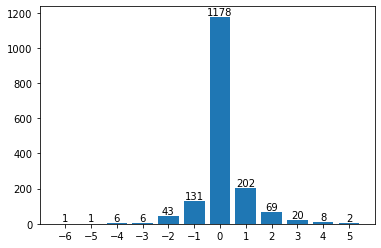

In [10]:
import matplotlib.pyplot as plt

labels, counts = np.unique(hasil, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
# Add labels on each bar
for i in range(len(labels)):
    plt.text(labels[i], counts[i], str(counts[i]), ha='center', va='bottom')
plt.show()

In [11]:
# Create a value replacement dictionary
mapping = {'positif': 1, 'netral': 0, 'negatif': -1}

# Replace values in sentiment columns using the replacement dictionary
df['sentiment'] = df['sentiment'].map(mapping)

df

,Unnamed: 0,tweet,clean_tweet,sentiment
0,0,GA 2 tumbler kece by Uniqlo new untuk 2 orang ...,tumbler kece by uniqlo new orang silakan reply...,NaN
1,1,Udah gajian tetep ga sanggup belanja di uniqlo,udah gajian tetep sanggup belanja uniqlo,NaN
2,2,Sering padahal begini Uniqlo pernah dapet UT g...,uniqlo dapet ut graphic harga doang,NaN
3,3,MASIH ADA GA KLU ADA BESOK GW SAMPERIN UNIQLO ...,klu besok gw samperin uniqlo deket rumah,NaN
4,4,Wiiii uniqlo lagi diskon yuk,wiiii uniqlo diskon yuk,NaN
...,...,...,...,...
1662,1662,Jaman SMA pengen ke mall Kuningan apa tu jauh ...,jaman sma pengen mall kuningan tu pengen liat ...,NaN
1663,1663,Saya sih pengguna Uniqlo H amp M dan Levi s se...,sih pengguna uniqlo h amp m levi s sejati hasi...,NaN
1664,1664,Uniqlo kapan diskon lg si,uniqlo diskon lg si,NaN
1665,1665,Uniqlo,uniqlo,NaN


In [12]:
# We will count the number of positive, negative, neutral tweets. 
# We will compare these results later after using machine learning
def count_sentiment():
    # Counts the number of records with positive values
    count_positif = df[df['sentiment'] == 1]['sentiment'].count()

    # Counts the number of records with neutral values
    count_netral = df[df['sentiment'] == 0]['sentiment'].count()

    # Counts the number of records with negatives values
    count_negatif = df[df['sentiment'] == -1]['sentiment'].count()

    print("Number of records with positive values:", count_positif)
    print("Number of records with neutral values:", count_netral)
    print("Number of records with negative values:", count_negatif)
count_sentiment()

Number of records with positive values: 0
Number of records with neutral values: 0
Number of records with negative values: 0


# Modelling

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [14]:
'''
As we know to be able to use a machine learning model 
Then we need data with numeric or integer type, but one of the features we have 
is text data. Well on this occasion we will utilize the text data change method - matrix 
what we have learned before, namely TF-IDF
'''
#Mari we get started, we'll take advantage of the TfidVectorizer method in the sklearn and gaussian Naive Bayes libraries.
vectorizer = TfidfVectorizer (max_features=2500)

model_g = GaussianNB()

In [15]:
#Lalu we convert our text_clean data into the form of TFIDF Vectorizer
v_data = vectorizer.fit_transform(df['clean_tweet']).toarray()

vectorizer.fit_transform(df['clean_tweet'])

<1667x2500 sparse matrix of type '<class 'numpy.float64'>'
	with 13100 stored elements in Compressed Sparse Row format>

In [16]:
#Setelah this let's divide the data into data train and test and then fit it into our model.

X_train, X_test, y_train, y_test = train_test_split(v_data, df['sentiment'], test_size=0.2, random_state=50)
model_g.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
#Dan we do the calculation of confussion matrix, classification report, and accuracy score

y_preds = model_g.predict(X_test)

print(confusion_matrix(y_test,y_preds))
print(classification_report(y_test,y_preds))
print('The accuracy score is ',accuracy_score(y_test, y_preds))

In [ ]:
df

In [ ]:
#Sekarang let's use it to classify tweet data

v_data = vectorizer.transform(df["clean_tweet"]).toarray()
y_classification = model_g.predict(v_data)

df["sentiment"] = list(y_classification)

df

In [ ]:
# Show number of positive, negative, neutral tweets. See the difference
count_sentiment()

# Insight

In [ ]:
#jumlah characters in tweets
bin_range = np.arange(0, 260, 10)
df['clean_tweet'].str.len().hist(bins=bin_range)
plt.show()

In [ ]:
#jumlah words in tweets
bin_range = np.arange(0, 50)
df['clean_tweet'].str.split().map(lambda x: len(x)).hist(bins=bin_range)
plt.show()

In [ ]:
# Average Word length On tweets
df['clean_tweet'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
plt.show()

In [ ]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: word_tokenize(str(x)))
tweets = [word for tweet in df['clean_tweet'] for word in tweet]

In [ ]:
# To display the most outgoing words in a tweet, we use the freqdist function in the ntlk module
from nltk.probability import FreqDist
fqdist = FreqDist(tweets)

most_common_word = fqdist.most_common(20)

print(most_common_word)

In [ ]:
# then create a visualization for easy viewing
fqdist.plot(20,cumulative=False)

plt.show()

In [ ]:
# biagram analysis
result = pd.Series(nltk.ngrams(tweets, 2)).value_counts()[:20]
print (result)

In [ ]:
df['clean_tweet'] = df['clean_tweet'].str.join(' ')

In [ ]:
# For the last visualization use WordCloud to see what words appear in the Tweet
from wordcloud import WordCloud
# Combine all reviews for the desired sentiment
combined_text = " ".join([review for review in df['clean_tweet']])

# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.imshow(wc.generate(combined_text))
plt.axis('off')
plt.show()